# Predicting Employee Attrition: A Data-driven Approach

## Introduction

Employee attrition which is defined as the process of employees leaving a company, whether voluntarily or involuntarily, poses significant challenges for businesses, impacting hiring costs, productivity, and overall workplace dynamics. Understanding the reasons behind employee departures is essential for addressing this issue effectively [1].

In this project, we aim to predict employee attrition using a dataset containing various employee-related information. We've selected this dataset as the foundation for our analysis. Our objective is to determine if specific factors within this dataset can accurately predict whether an employee will leave the company or not.

You can access the dataset here: [Employee_Dataset](https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors/data). It includes data such as employee salary, department, education, work-life balance, job satisfaction, tenure, and age.

Our approach involves creating a predictive model. The model will utilize factors of Age and Monthly_Income to predict whether an employee will leave a company or not. We aim to find the accuracy of this model in predicting employee attrition. By evaluating the model, we seek to determine whether Age and monthly salary are reliable predictors of employee turnover.

## Methods

In our dataset, we aim to investigate how  Monthly_Income and Age are associated with Attrition. Attrition is categorized as "Yes" (indicating an employee has left the company) or "No" (indicating the employee is still with the company) in the Attrition column. We'll focus exclusively on these three variables for our analysis.

1. Monthly_Income: Monthly Income of the Employee
2. Age: Age of the Employee
3. Attrition

Given that Attrition is categorical, we'll employ a classification approach using the K-nearest neighbours (KNN) algorithm. We will construct a model utilizing the Salary and Age as predictors. Our methodology encompasses data preprocessing, partitioning the data into training and testing sets, standardizing the data, building the KNN model, and evaluating its performance via cross-validation to identify the optimal K value. Subsequently, we'll refine the classifier with the chosen K value and gauge its accuracy on the test set using a confusion matrix.

For this exploratory analysis, we'll leverage Jupyter and R. Initially, we'll load essential packages such as tidyverse and tidy models. Then we will import the dataset. We'll then clean the data by selecting the variables needed for analysis, converting Attrition into a factor, and adjusting column names to adhere to R coding conventions. To ensure reproducibility, we'll establish a seed and then split the data into training and testing data. Using testing data we will find percentage of attrition, number of rows in the dataset and visualize distribution of attrition based on age and monthly income using a histogram.

## Preliminary exploratory data analysis


In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0  

### Loading data


In [2]:
# Reading data from the file
employee <- read_csv("data/HR_Analytics.csv")
employee |> head(5)

Rows: 1470 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Attrition, BusinessTravel, Department, EducationField, Gender, Job...
dbl (26): Age, DailyRate, DistanceFromHome, Education, EmployeeCount, Employ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2


### Table 1. Sample of dataset with the chosen predictors


In [3]:
# Selecting the necessary columns and mutating the name of the column
# using the R convention and mutating the Attrition column to a factor

# Dropping Na Values

employee <- employee |>
         select(Attrition, MonthlyIncome, Age) |>
         mutate(Attrition = as_factor(Attrition)) |>
         rename(Monthly_Income = MonthlyIncome) |>
         drop_na() 

employee |> head(5)
     

Attrition,Monthly_Income,Age
<fct>,<dbl>,<dbl>
Yes,5993,41
No,5130,49
Yes,2090,37
No,2909,33
No,3468,27


The table above shows first 5 rows from the dataset with selected columns (Attrition, Monthly_Income and Age)

### Spliting the dataset into 75% training and 25% testing data


In [4]:
#Setting the seed for reproducibility 
set.seed(1000)

#Splitting data into training and testing data 
employee_split <- initial_split(employee, prop = 0.75, strata = Attrition)
employee_train <- training(employee_split)
employee_test <- testing(employee_split) 

### Finding number of rows in the dataset

In [5]:
#Finding number of rows in the dataset
nrow(employee_train)

[1] 1101

### Table 2. Proportions of the attrition in the dataset

In [6]:
employee_proportions <- employee_train |>
                      group_by(Attrition) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(employee_train))
employee_proportions

Attrition,n,percent
<fct>,<int>,<dbl>
Yes,177,16.07629
No,924,83.92371


From the table above we see that 16.07% of the training dataset are the employees that have left the company (Attrition = Yes) and 83.92% of the training dataset are employees that have not left the company (Attrition = No).



### Table 3. Mean values of the chosen parameters with regard to attrition


In [7]:
mean_statistics <- employee_train |>
              group_by(Attrition) |>
              summarize(mean_monthly_income = mean(Monthly_Income), mean_age = mean(Age))

mean_statistics

Attrition,mean_monthly_income,mean_age
<fct>,<dbl>,<dbl>
Yes,4546.571,33.27119
No,6891.736,37.79437


### Plot 1.  Employee Distribution(By Age)

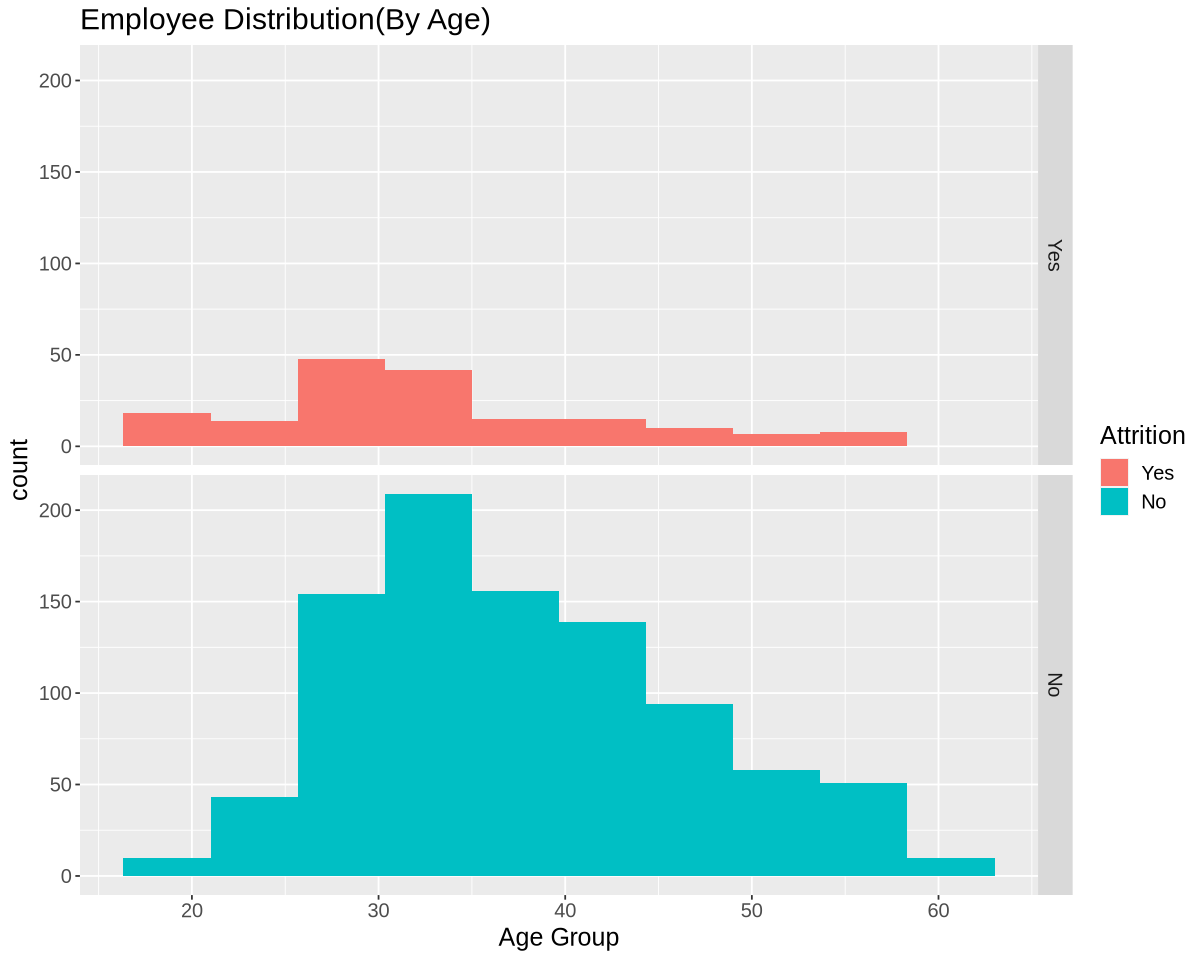

In [8]:
options(repr.plot.width= 10, repr.plot.height= 8)

age_distribution <- employee_train |>
                    ggplot(aes(x = Age, fill =  Attrition)) +
                    geom_histogram(bins = 10) +
                    facet_grid(rows = vars(Attrition))+
                    labs(x= "Age Group") +
                    ggtitle("Employee Distribution(By Age)") +
                    theme(text = element_text(size = 15))
age_distribution



     

In [9]:
### Plot 2.  Employee Distribution(By Monthly Income)

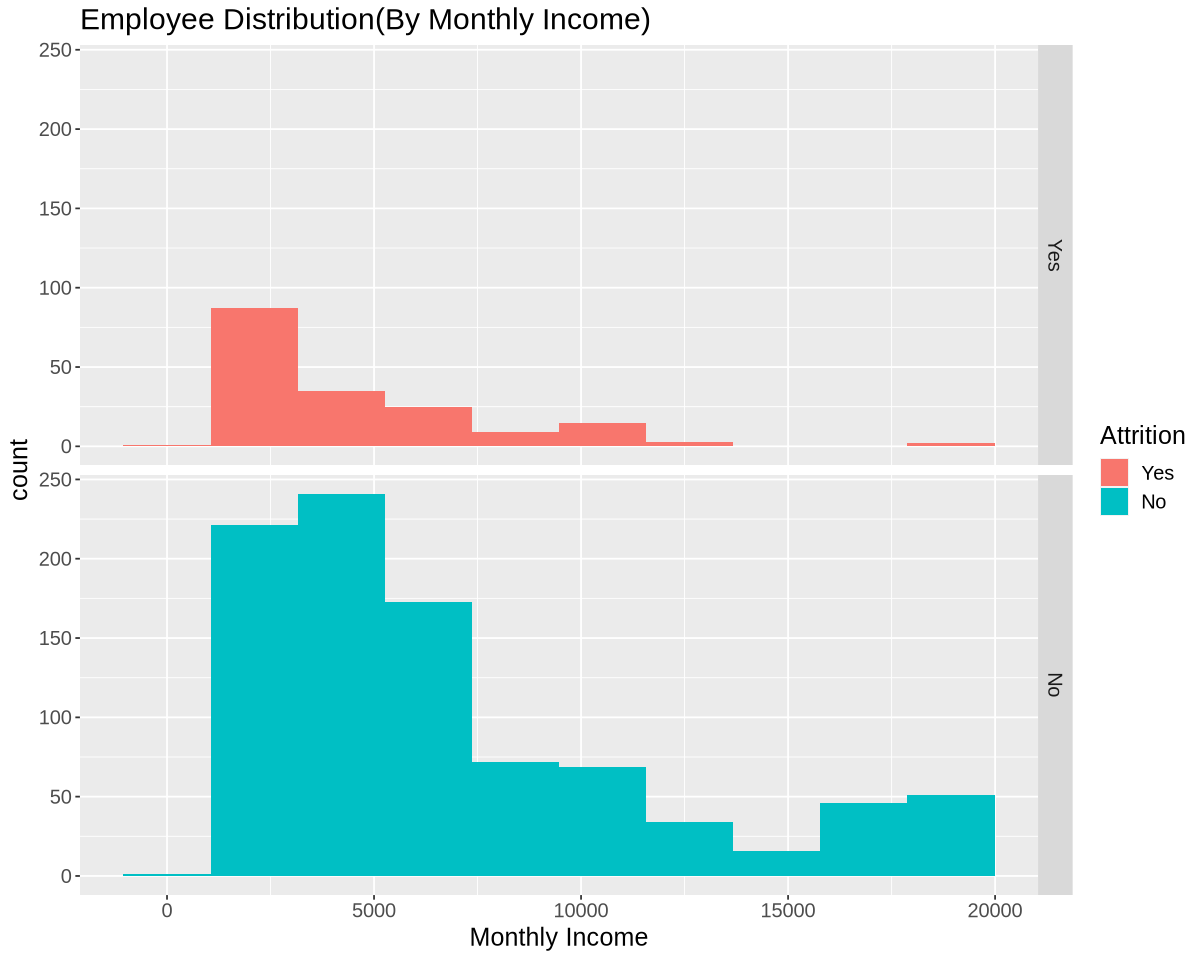

In [10]:
options(repr.plot.width= 10, repr.plot.height= 8)

income_distribution <- employee_train |>
                        ggplot(aes(x = Monthly_Income, fill =  Attrition)) +
                        geom_histogram(bins = 10) +
                        facet_grid(rows = vars(Attrition))+
                        labs(x = "Monthly Income") +
                         ggtitle("Employee Distribution(By Monthly Income)") +
                        theme(text = element_text(size = 15))
income_distribution

## Expected outcomes and significance

From this project, we anticipate discovering that the model created using salary and age are influential factors in determining whether an employee will leave a company or not. Recognizing these factors can aid in formulating targeted retention strategies to mitigate attrition rates.

The insights gathered from this project could hold considerable implications for HR departments and organizational management. Future investigations could look into additional factors influencing attrition or assess the efficacy of various retention 
strategy to keep employees working for the company.


## References

1. Employee attrition and factors. (n.d.). Retrieved from https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors/data
2. Understanding employee attrition: A comprehensive guide. (2024). Retrieved from https://www.elevatus.io/blog/employee-attrition-comprehensive-guide/ 
